In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
subjects = ["","Robert Downy Jr.","Emma Watson"]

In [5]:
# Face Detector 

#function to detect face using OpenCV
def detect_face(img):
#convert the test image to gray scale as opencv face detector expects gray images
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
    # load OpenCV face detector, I am using LBP which is fast
    #there is also a more accurate but slow: Haar classifier
    face_cascade = cv2.CascadeClassifier('open_cv/opencv-master/data/lbpcascades/lbpcascade_frontalface.xml')
 
    #let's detect multiscale images(some images may be closer to camera than others)
    #result is a list of faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5);
 
    #if no faces are detected then return original img
    if (len(faces) == 0):
        return None, None
 
    #under the assumption that there will be only one face,
    #extract the face area
    (x, y, w, h) = faces[0]
 
    #return only the face part of the image
    return gray[y:y+w, x:x+h], faces[0]

In [6]:
def prepare_training_data(data_folder_path):
    dirs = os.listdir(data_folder_path)
    
    faces = []
    labels = []
    
    for dir_name in dirs:
        if not dir_name.startswith('s'):
            continue
        label = int(dir_name.replace("s",""))
        subject_dir_path = data_folder_path+"/"+dir_name
        subject_images_names = os.listdir(subject_dir_path)
        
        for image_name in subject_images_names:
            if image_name.startswith("."):
                continue
            image_path = subject_dir_path + "/" + image_name
            
            image = cv2.imread(image_path)
            cv2.imshow("Training on image... ",image)
            cv2.waitKey(100)
            
            face, rect = detect_face(image)
            
            if face is not None:
                faces.append(face)
                labels.append(label)
    cv2.destroyAllWindows()
    cv2.waitKey(1)
    cv2.destroyAllWindows()
    
    return faces,labels

In [7]:
print("Preparing Data... ")
faces, labels = prepare_training_data("training-data")

print("Data Prepared")

print("Total Faces: ",len(faces))
print("Total Labels: ",len(labels))


Preparing Data... 
Data Prepared
Total Faces:  27
Total Labels:  27


In [10]:
labels

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

/home/robhood97/Desktop/courses_programs/tensorflow/venv/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


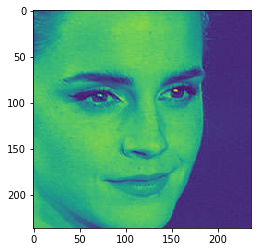

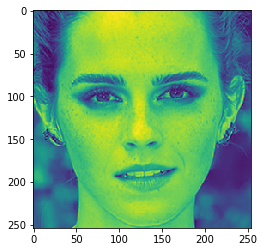

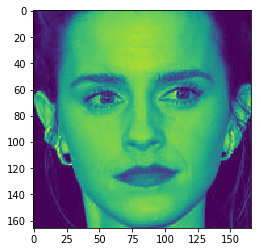

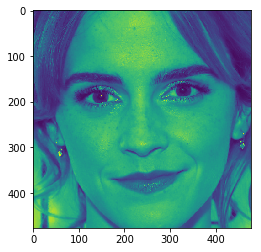

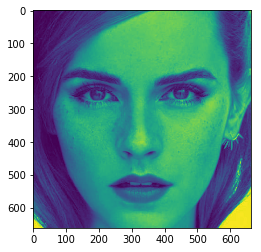

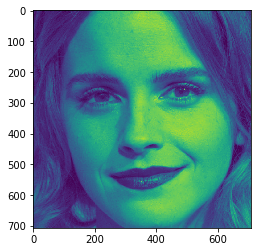

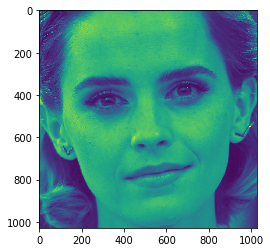

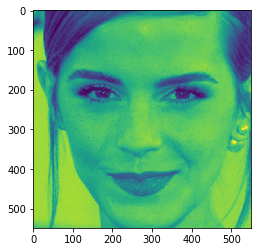

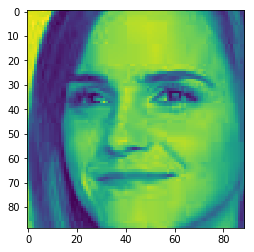

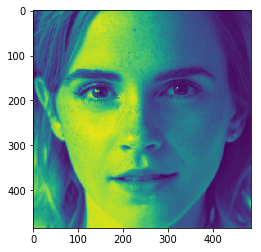

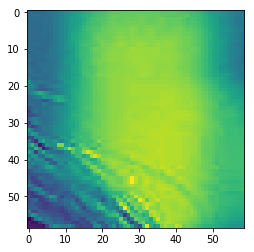

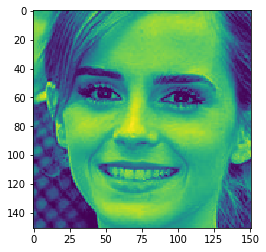

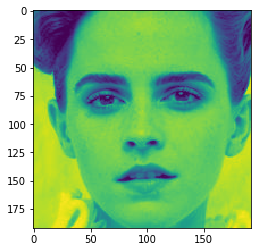

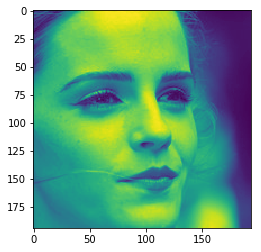

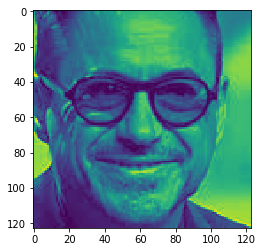

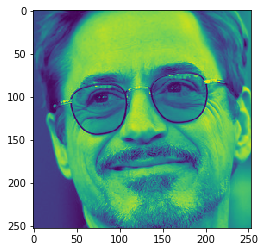

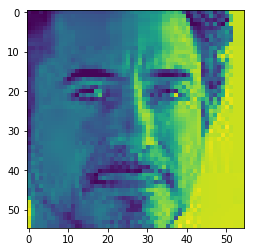

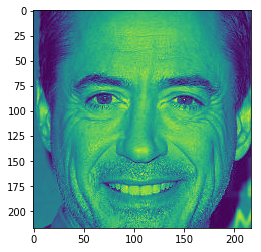

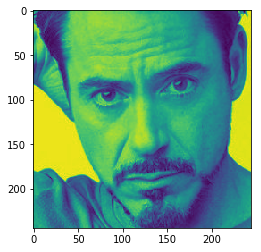

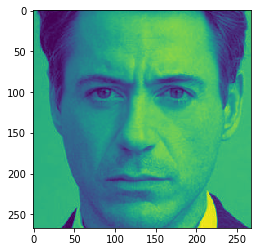

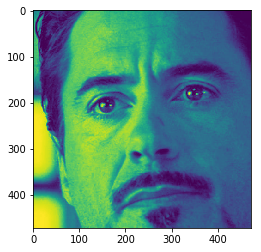

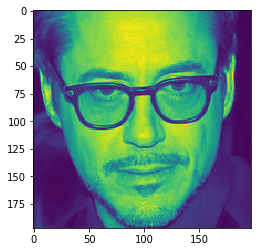

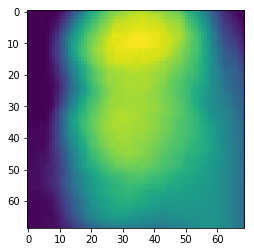

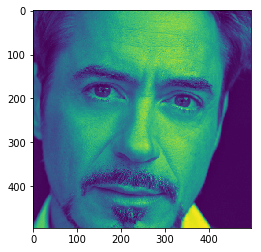

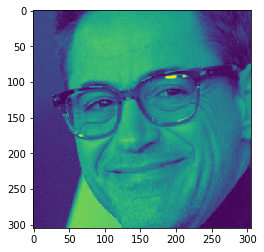

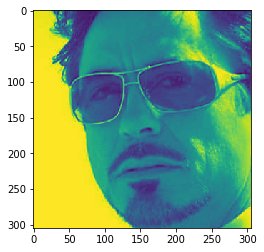

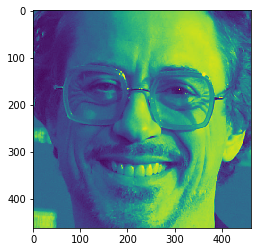

In [8]:
for i in range(len(labels)):
    plt.figure()
    plt.imshow(faces[i])
    
    

In [11]:
# img = cv2.imread("training-data/s1/1.jpg")
# print(img)
# detect_face(img)

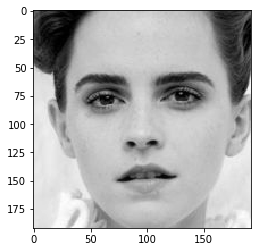

In [12]:
plt.imshow(faces[12],cmap='gray')

In [13]:
face_recognizer = cv2.face.LBPHFaceRecognizer_create()

In [14]:
face_recognizer.train(faces,np.array(labels))

In [15]:
def draw_rectangle(img, rect):
    (x, y, w, h) = rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 8)

In [16]:
def draw_text(img, text, x, y):
    cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)

In [17]:
def predict(test_img):
    img = test_img.copy()
    face,rect = detect_face(img)
#     plt.imshow(face,cmap='gray')
    label = face_recognizer.predict(face)
    a = label[0]
    label_text = subjects[a]
    
    draw_rectangle(img,rect)
    draw_text(img,label_text,rect[0],rect[1]-5)
    
    return img

In [25]:
print("Predicting images...")

#load test images
test_img1 = cv2.imread("test-data/r2.jpg")
# test_img2 = cv2.imread("test-data/2.jpg")
# test_img3 = cv2.imread("test-data/3.jpeg")

#perform a prediction
predicted_img1 = predict(test_img1)
# predicted_img2 = predict(test_img2)
# predicted_img3 = predict(test_img3)

print("Prediction complete")

#display both images
cv2.imshow(subjects[1], predicted_img1)
# cv2.imshow(subjects[2], predicted_img2)
# cv2.imshow(subjects[2],predicted_img3)


cv2.waitKey(0)
cv2.destroyAllWindows()


# p = predict(cv2.imread("test-data/2.jpg"))

Predicting images...
Prediction complete
